Layton Miller - 9/27/2024 - ECGR 5105

1a

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Housing.csv')

# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# Define Output Variables
Y = df[['price']]

# Split into training and validation sets
X_training, X_validation, Y_training, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=18)

# Display training and validation data
print("Training Input Data:\n", X_training)
print("Training Output Data:\n", Y_training)
print("Validation Input Data:\n", X_validation)
print("Training Output Data:\n", Y_validation)




Mounted at /content/drive
Training Input Data:
       area  bedrooms  bathrooms  stories  parking
252   9860         3          1        1        0
223   6321         3          1        2        1
179   3180         3          2        2        2
10   13200         3          1        2        2
261   3510         3          1        2        0
..     ...       ...        ...      ...      ...
242   3640         3          1        2        0
174   3800         3          1        2        1
120   6540         3          1        1        2
275   4032         2          1        1        0
298   5800         3          1        1        2

[436 rows x 5 columns]
Training Output Data:
        price
252  4515000
223  4760000
179  5215000
10   9800000
261  4473000
..       ...
242  4550000
174  5250000
120  5950000
275  4319000
298  4200000

[436 rows x 1 columns]
Validation Input Data:
      area  bedrooms  bathrooms  stories  parking
160  6210         4          1        4        0
11 

<ipython-input-3-33586a44835d>:55: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-3-33586a44835d>:68: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


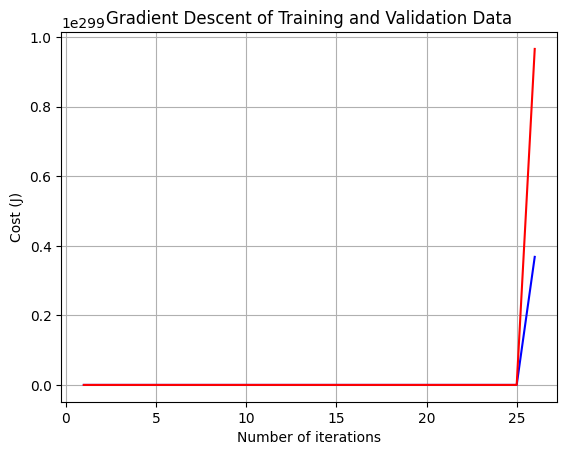

Theta for Validation: [nan nan nan nan nan nan]
Theta for Training: [nan nan nan nan nan nan]
Cost for Training: [1.03081286e+024 9.89232488e+034 9.49329359e+045 9.11035821e+056
 8.74286947e+067 8.39020429e+078 8.05176474e+089 7.72697697e+100
 7.41529032e+111 7.11617632e+122]
Cost for Validation: [3.72940201e+023 3.87415005e+034 4.02451614e+045 4.18071835e+056
 4.34298318e+067 4.51154594e+078 4.68665107e+089 4.86855250e+100
 5.05751401e+111 5.25380962e+122]


In [3]:
# Separate into each parameter
t_area = X_training.values[:, 0]  # get input value for area from the inputs training
t_bedrooms = X_training.values[:, 1] # get input value for bedrooms from the inputs training
t_bathrooms = X_training.values[:, 2] # get input value for bathrooms from the inputs training
t_stories = X_training.values[:, 3] # get input value for stories from the inputs training
t_parking = X_training.values[:, 4] # get input value for parking from the inputs training
training_price = Y_training.values[:, 0]  # get price from outputs training

# Separate into each parameter
v_area = X_validation.values[:, 0]  # get input value for area from the inputs validation
v_bedrooms = X_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v_bathrooms = X_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v_stories = X_validation.values[:, 3] # get input value for stories from the inputs validation
v_parking = X_validation.values[:, 4] # get input value for parking from the inputs validation
validation_price = Y_validation.values[:, 0]  # get price from outputs validation

# Length of training and validation set
m = len(training_price)
n = len(validation_price)

# Reshape datasets for matrix operations
training_area = t_area.reshape(m,1)
training_bedrooms = t_bedrooms.reshape(m,1)
training_bathrooms = t_bathrooms.reshape(m,1)
training_stories = t_stories.reshape(m,1)
training_parking = t_parking.reshape(m,1)


# Reshape datasets for matrix operations
validation_area = v_area.reshape(n,1)
validation_bedrooms = v_bedrooms.reshape(n,1)
validation_bathrooms = v_bathrooms.reshape(n,1)
validation_stories = v_stories.reshape(n,1)
validation_parking = v_parking.reshape(n,1)

# Create an matrix of m ones for matrix operations
training_0 = np.ones((m,1))
validation_0 = np.ones((n,1))

# Combine all parameters into one matrix
training_all = np.hstack((training_0, training_area, training_bedrooms, training_bathrooms, training_stories, training_parking))
validation_all = np.hstack((validation_0, validation_area, validation_bedrooms, validation_bathrooms, validation_stories, validation_parking))

#Set learning rate, iterations, and theta array
alpha = 0.01
iterations = 100
theta_training = np.zeros(6)
theta_validation = np.zeros(6)

# Define Basic Cost Function
def compute_cost(X, y, theta):

  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

# Define Gradient Descent Equation
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)  # Number of training examples
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, y, theta)

  return theta, cost_history

#Run gradient descent for new model
theta_training, cost_history_training = gradient_descent(training_all, training_price, theta_training, alpha, iterations)
theta_validation, cost_history_validation = gradient_descent(validation_all, validation_price, theta_validation, alpha, iterations)

#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')

# Show the plot
plt.show()


print('Theta for Validation:', theta_validation[:10])
print('Theta for Training:', theta_training[:10])
print('Cost for Training:', cost_history_training[:10])
print('Cost for Validation:', cost_history_validation[:10])

1b

In [4]:
# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables and replace yes/no with 1/0
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})
X1 = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

# Define Output Variables
Y1 = df[['price']]

# Split into training and validation sets
X1_training, X1_validation, Y1_training, Y1_validation = train_test_split(X1, Y1, test_size=0.2, random_state=18)

# Display training and validation data
print("Training Input Data:\n", X1_training)
print("Training Output Data:\n", Y1_training)
print("Validation Input Data:\n", X1_validation)
print("Training Output Data:\n", Y1_validation)


Training Input Data:
       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
252   9860         3          1        1         1          0         0   
223   6321         3          1        2         1          0         1   
179   3180         3          2        2         1          0         0   
10   13200         3          1        2         1          0         1   
261   3510         3          1        2         1          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
242   3640         3          1        2         1          0         0   
174   3800         3          1        2         1          1         1   
120   6540         3          1        1         1          1         1   
275   4032         2          1        1         1          0         1   
298   5800         3          1        1         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  
252               

<ipython-input-3-33586a44835d>:55: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-3-33586a44835d>:68: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


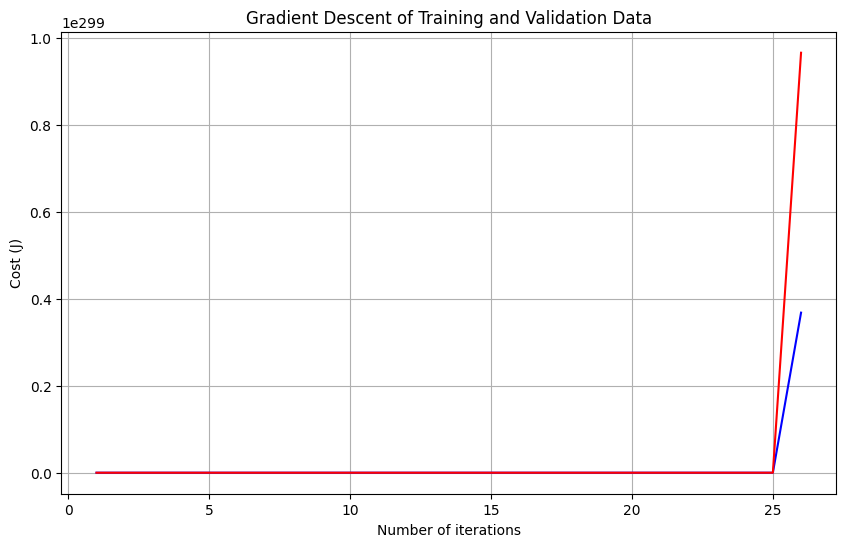

Theta for Validation: [nan nan nan nan nan nan nan nan nan nan]
Theta for Training: [nan nan nan nan nan nan nan nan nan nan]
Cost for Training: [1.03081294e+024 9.89232617e+034 9.49329542e+045 9.11036053e+056
 8.74287224e+067 8.39020747e+078 8.05176828e+089 7.72698085e+100
 7.41529451e+111 7.11618078e+122]
Cost for Validation: [3.72940231e+023 3.87415066e+034 4.02451709e+045 4.18071965e+056
 4.34298487e+067 4.51154804e+078 4.68665361e+089 4.86855551e+100
 5.05751752e+111 5.25381367e+122]


In [5]:
# Separate into each parameter
t1_area = X1_training.values[:, 0]  # get input value for area from the inputs training
t1_bedrooms = X1_training.values[:, 1] # get input value for bedrooms from the inputs training
t1_bathrooms = X1_training.values[:, 2] # get input value for bathrooms from the inputs training
t1_stories = X1_training.values[:, 3] # get input value for stories from the inputs training
t1_mainroad = X1_training.values[:, 4] # get input value for mainroad from the inputs training
t1_guestroom = X1_training.values[:, 5] # get input value for guestroom from the inputs training
t1_basement = X1_training.values[:, 6] # get input value for basement from the inputs training
t1_hotwaterheating = X1_training.values[:, 7] # get input value for hotwaterheating from the inputs training
t1_airconditioning = X1_training.values[:, 8] # get input value for airconditioning from the inputs training
t1_parking = X1_training.values[:, 9] # get input value for parking from the inputs training
t1_prefarea = X1_training.values[:, 10] # get input value for prefarea from the inputs training
training_price1 = Y1_training.values[:, 0]  # get price from outputs training

# Separate into each parameter
v1_area = X1_validation.values[:, 0]  # get input value for area from the inputs validation
v1_bedrooms = X1_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v1_bathrooms = X1_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v1_stories = X1_validation.values[:, 3] # get input value for stories from the inputs validation
v1_mainroad = X1_validation.values[:, 4] # get input value for mainroad from the inputs validation
v1_guestroom = X1_validation.values[:, 5] # get input value for guestroom from the inputs validation
v1_basement = X1_validation.values[:, 6] # get input value for basement from the inputs validation
v1_hotwaterheating = X1_validation.values[:, 7] # get input value for hotwaterheating from the inputs validation
v1_airconditioning = X1_validation.values[:, 8] # get input value for airconditioning from the inputs validation
v1_parking = X1_validation.values[:, 9] # get input value for parking from the inputs validation
v1_prefarea = X1_validation.values[:, 10] # get input value for prefarea from the inputs validation
validation_price1 = Y1_validation.values[:, 0]  # get price from outputs validation

# Length of training and validation set
m = len(training_price1)
n = len(validation_price1)

# Reshape datasets for matrix operations
training_area1 = t1_area.reshape(m,1)
training_bedrooms1 = t1_bedrooms.reshape(m,1)
training_bathrooms1 = t1_bathrooms.reshape(m,1)
training_stories1 = t1_stories.reshape(m,1)
training_mainroad1 = t1_mainroad.reshape(m,1)
training_guestroom1 = t1_guestroom.reshape(m,1)
training_basement1 = t1_basement.reshape(m,1)
training_hotwaterheating1 = t1_hotwaterheating.reshape(m,1)
training_airconditioning1 = t1_airconditioning.reshape(m,1)
training_parking1 = t1_parking.reshape(m,1)
training_prefarea1 = t1_prefarea.reshape(m,1)


# Reshape datasets for matrix operations
validation_area1 = v1_area.reshape(n,1)
validation_bedrooms1 = v1_bedrooms.reshape(n,1)
validation_bathrooms1 = v1_bathrooms.reshape(n,1)
validation_stories1 = v1_stories.reshape(n,1)
validation_mainroad1 = v1_mainroad.reshape(n,1)
validation_guestroom1 = v1_guestroom.reshape(n,1)
validation_basement1 = v1_basement.reshape(n,1)
validation_hotwaterheating1 = v1_hotwaterheating.reshape(n,1)
validation_airconditioning1 = v1_airconditioning.reshape(n,1)
validation_parking1 = v1_parking.reshape(n,1)
validation_prefarea1 = v1_prefarea.reshape(n,1)


# Create an matrix of m ones for matrix operations
training1_0 = np.ones((m,1))
validation1_0 = np.ones((n,1))

# Combine all parameters into one matrix
training_all1 = np.hstack((training1_0, training_area1, training_bedrooms1,training_bathrooms1, training_stories1, training_mainroad1, training_guestroom1, training_basement1, training_hotwaterheating1, training_airconditioning1, training_parking1, training_prefarea1))
validation_all1 = np.hstack((validation1_0, validation_area1, validation_bedrooms1,validation_bathrooms1, validation_stories1, validation_mainroad1, validation_guestroom1, validation_basement1, validation_hotwaterheating1, validation_airconditioning1, validation_parking1, validation_prefarea1))

#Set learning rate, iterations, and theta array
alpha = 0.01
iterations = 100
theta_training1 = np.zeros(12)
theta_validation1 = np.zeros(12)

#Run gradient descent for new model
theta_training1, cost_history_training1 = gradient_descent(training_all1, training_price1, theta_training1, alpha, iterations)
theta_validation1, cost_history_validation1 = gradient_descent(validation_all1, validation_price1, theta_validation1, alpha, iterations)

#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training1, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation1, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')

# Show the plot
plt.show()

print('Theta for Validation:', theta_validation1[:10])
print('Theta for Training:', theta_training1[:10])
print('Cost for Training:', cost_history_training1[:10])
print('Cost for Validation:', cost_history_validation1[:10])


2a

In [6]:

# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables
X2a = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X2a_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Define Output Variables
Y2a = df[['price']]

# Split into training and validation sets
np.random.seed(9)
X2a_training, X2a_validation, Y2a_training, Y2a_validation = train_test_split(X2a, Y2a, test_size=0.2, random_state=18)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# Standardize all the inputs
X2a_training[X2a_names] = scaler.fit_transform(X2a_training[X2a_names])
X2a_training.head()
X2a_validation[X2a_names] = scaler.fit_transform(X2a_validation[X2a_names])
X2a_validation.head()

scaler2 = MinMaxScaler()
# Normalize all the inputs
X2a_training[X2a_names] = scaler2.fit_transform(X2a_training[X2a_names])
X2a_training.head()
X2a_validation[X2a_names] = scaler2.fit_transform(X2a_validation[X2a_names])
X2a_validation.head()

# Display training and validation data
print("Training Input Data:\n", X2a_training)
print("Training Output Data:\n", Y2a_training)
print("Validation Input Data:\n", X2a_validation)
print("Training Output Data:\n", Y2a_validation)


Training Input Data:
          area  bedrooms  bathrooms   stories   parking
252  0.564261       0.4        0.0  0.000000  0.000000
223  0.321031       0.4        0.0  0.333333  0.333333
179  0.105155       0.4        0.5  0.333333  0.666667
10   0.793814       0.4        0.0  0.333333  0.666667
261  0.127835       0.4        0.0  0.333333  0.000000
..        ...       ...        ...       ...       ...
242  0.136770       0.4        0.0  0.333333  0.000000
174  0.147766       0.4        0.0  0.333333  0.333333
120  0.336082       0.4        0.0  0.000000  0.666667
275  0.163711       0.2        0.0  0.000000  0.000000
298  0.285223       0.4        0.0  0.000000  0.666667

[436 rows x 5 columns]
Training Output Data:
        price
252  4515000
223  4760000
179  5215000
10   9800000
261  4473000
..       ...
242  4550000
174  5250000
120  5950000
275  4319000
298  4200000

[436 rows x 1 columns]
Validation Input Data:
          area  bedrooms  bathrooms   stories   parking
160  0.45031

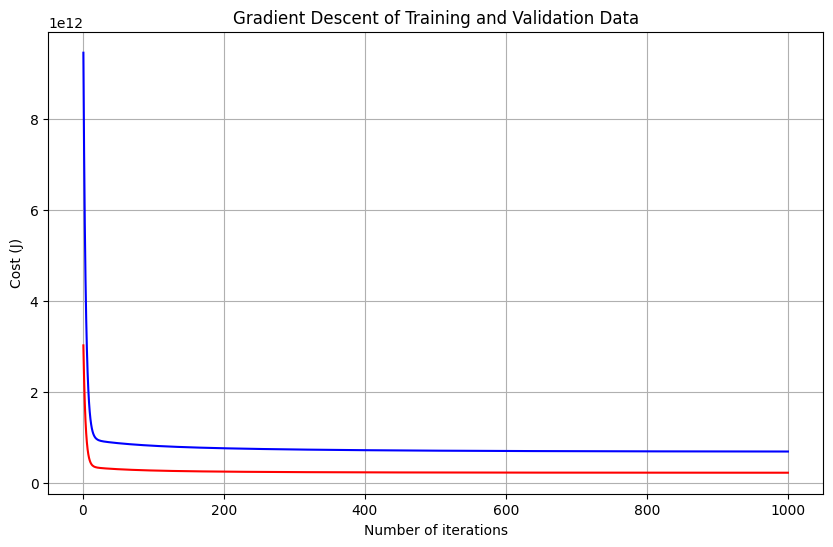

Theta validation: [2511015.71164931 3150322.13558846  609628.88942426 4614553.85143006
 1486045.49674143 1675437.87778039]
Theta training: [2363826.74940457 4177197.1746689   972521.72643534 1984533.13484891
 1582990.87665337 1060249.89582615]
Training cost: [6.98702594e+11 6.98689640e+11 6.98676734e+11 6.98663877e+11
 6.98651069e+11 6.98638308e+11 6.98625596e+11 6.98612931e+11
 6.98600314e+11 6.98587745e+11]
Validation Cost: [2.32950468e+11 2.32948024e+11 2.32945591e+11 2.32943169e+11
 2.32940759e+11 2.32938359e+11 2.32935970e+11 2.32933591e+11
 2.32931224e+11 2.32928867e+11]


In [7]:
# Separate into each parameter
t2a_area = X2a_training.values[:, 0]  # get input value for area from the inputs training
t2a_bedrooms = X2a_training.values[:, 1] # get input value for bedrooms from the inputs training
t2a_bathrooms = X2a_training.values[:, 2] # get input value for bathrooms from the inputs training
t2a_stories = X2a_training.values[:, 3] # get input value for stories from the inputs training
t2a_parking = X2a_training.values[:, 4] # get input value for parking from the inputs training
training_price2a = Y2a_training.values[:, 0]  # get price from outputs training

# Separate into each parameter
v2a_area = X2a_validation.values[:, 0]  # get input value for area from the inputs validation
v2a_bedrooms = X2a_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v2a_bathrooms = X2a_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v2a_stories = X2a_validation.values[:, 3] # get input value for stories from the inputs validation
v2a_parking = X2a_validation.values[:, 4] # get input value for parking from the inputs validation
validation_price2a = Y2a_validation.values[:, 0]  # get price from outputs validation

# Length of training and validation set
m = len(training_price2a)
n = len(validation_price2a)

# Reshape datasets for matrix operations
training_area2a = t2a_area.reshape(m,1)
training_bedrooms2a = t2a_bedrooms.reshape(m,1)
training_bathrooms2a = t2a_bathrooms.reshape(m,1)
training_stories2a = t2a_stories.reshape(m,1)
training_parking2a = t2a_parking.reshape(m,1)

# Reshape datasets for matrix operations
validation_area2a = v2a_area.reshape(n,1)
validation_bedrooms2a = v2a_bedrooms.reshape(n,1)
validation_bathrooms2a = v2a_bathrooms.reshape(n,1)
validation_stories2a = v2a_stories.reshape(n,1)
validation_parking2a = v2a_parking.reshape(n,1)

# Create an matrix of m ones for matrix operations
training2a_0 = np.ones((m,1))
validation2a_0 = np.ones((n,1))

# Combine all parameters into one matrix
training_all2a = np.hstack((training2a_0, training_area2a, training_bedrooms2a, training_bathrooms2a, training_stories2a, training_parking2a))
validation_all2a = np.hstack((validation2a_0, validation_area2a, validation_bedrooms2a, validation_bathrooms2a, validation_stories2a, validation_parking2a))

#Set learning rate, iterations, and theta array
alpha = 0.1
iterations = 1000
theta_training2a = np.zeros(6)
theta_validation2a = np.zeros(6)

#Run gradient descent for new model
theta_training2a, cost_history_training2a = gradient_descent(training_all2a, training_price2a, theta_training2a, alpha, iterations)
theta_validation2a, cost_history_validation2a = gradient_descent(validation_all2a, validation_price2a, theta_validation2a, alpha, iterations)

#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training2a, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation2a, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')

# Show the plot
plt.show()

print('Theta validation:', theta_validation2a[-10:])
print('Theta training:', theta_training2a[-10:])
print('Training cost:', cost_history_training2a[-10:])
print('Validation Cost:', cost_history_validation2a[-10:])

2b

In [8]:
# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables
X2b = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
X2b_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

# Define Output Variables
Y2b = df[['price']]

# Split into training and validation sets
np.random.seed(9)
X2b_training, X2b_validation, Y2b_training, Y2b_validation = train_test_split(X2b, Y2b, test_size=0.2, random_state=18)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# Standardize all the inputs
X2b_training[X2b_names] = scaler.fit_transform(X2b_training[X2b_names])
X2b_training.head()
X2b_validation[X2b_names] = scaler.fit_transform(X2b_validation[X2b_names])
X2b_validation.head()

scaler2 = MinMaxScaler()
# Normalize all the inputs
X2b_training[X2b_names] = scaler2.fit_transform(X2b_training[X2b_names])
X2b_training.head()
X2b_validation[X2b_names] = scaler2.fit_transform(X2b_validation[X2b_names])
X2b_validation.head()

# Display training and validation data
print("Training Input Data:\n", X2b_training)
print("Training Output Data:\n", Y2b_training)
print("Validation Input Data:\n", X2b_validation)
print("Training Output Data:\n", Y2b_validation)



Training Input Data:
          area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
252  0.564261       0.4        0.0  0.000000       1.0        0.0       0.0   
223  0.321031       0.4        0.0  0.333333       1.0        0.0       1.0   
179  0.105155       0.4        0.5  0.333333       1.0        0.0       0.0   
10   0.793814       0.4        0.0  0.333333       1.0        0.0       1.0   
261  0.127835       0.4        0.0  0.333333       1.0        0.0       0.0   
..        ...       ...        ...       ...       ...        ...       ...   
242  0.136770       0.4        0.0  0.333333       1.0        0.0       0.0   
174  0.147766       0.4        0.0  0.333333       1.0        1.0       1.0   
120  0.336082       0.4        0.0  0.000000       1.0        1.0       1.0   
275  0.163711       0.2        0.0  0.000000       1.0        0.0       1.0   
298  0.285223       0.4        0.0  0.000000       1.0        0.0       0.0   

     hotwaterheating  aircond

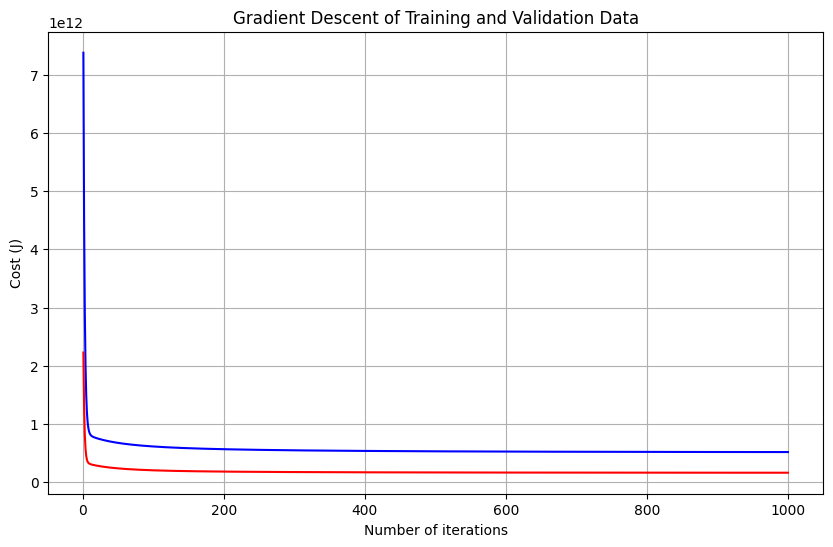

Theta for Validation: [1813329.62795326 2004198.03386238  388159.75079081 4108086.60785934
 1652591.00894704  436562.29855074  149907.97511509  292508.79615723
  540794.33769579  652741.76924596]
Theta for Training: [1744289.36195951 3098116.95388555  923358.45487796 1687558.81154796
 1214783.66309776  540942.37979715  403438.45538357  394502.60282747
 1089935.88117174  952141.09158139]
Cost for Training: [7.37512349e+12 4.55110946e+12 2.94366133e+12 2.02769024e+12
 1.50477200e+12 1.20530189e+12 1.03288684e+12 9.32741880e+11
 8.73729167e+11 8.38150183e+11]
Cost for Validation: [2.22711351e+12 1.29906937e+12 8.24182339e+11 5.80348564e+11
 4.54349252e+11 3.88469382e+11 3.53286842e+11 3.33801799e+11
 3.22366213e+11 3.15079666e+11]


In [9]:
# Separate into each parameter
t2b_area = X2b_training.values[:, 0]  # get input value for area from the inputs training
t2b_bedrooms = X2b_training.values[:, 1] # get input value for bedrooms from the inputs training
t2b_bathrooms = X2b_training.values[:, 2] # get input value for bathrooms from the inputs training
t2b_stories = X2b_training.values[:, 3] # get input value for stories from the inputs training
t2b_mainroad = X2b_training.values[:, 4] # get input value for mainroad from the inputs training
t2b_guestroom = X2b_training.values[:, 5] # get input value for guestroom from the inputs training
t2b_basement = X2b_training.values[:, 6] # get input value for basement from the inputs training
t2b_hotwaterheating = X2b_training.values[:, 7] # get input value for hotwaterheating from the inputs training
t2b_airconditioning = X2b_training.values[:, 8] # get input value for airconditioning from the inputs training
t2b_parking = X2b_training.values[:, 9] # get input value for parking from the inputs training
t2b_prefarea = X2b_training.values[:, 10] # get input value for prefarea from the inputs training
training_price2b = Y2b_training.values[:, 0]  # get price from outputs training

# Separate into each parameter
v2b_area = X2b_validation.values[:, 0]  # get input value for area from the inputs validation
v2b_bedrooms = X2b_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v2b_bathrooms = X2b_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v2b_stories = X2b_validation.values[:, 3] # get input value for stories from the inputs validation
v2b_mainroad = X2b_validation.values[:, 4] # get input value for mainroad from the inputs validation
v2b_guestroom = X2b_validation.values[:, 5] # get input value for guestroom from the inputs validation
v2b_basement = X2b_validation.values[:, 6] # get input value for basement from the inputs validation
v2b_hotwaterheating = X2b_validation.values[:, 7] # get input value for hotwaterheating from the inputs validation
v2b_airconditioning = X2b_validation.values[:, 8] # get input value for airconditioning from the inputs validation
v2b_parking = X2b_validation.values[:, 9] # get input value for parking from the inputs validation
v2b_prefarea = X2b_validation.values[:, 10] # get input value for prefarea from the inputs validation
validation_price2b = Y2b_validation.values[:, 0]  # get price from outputs validation

# Length of training and validation set
m = len(training_price2b)
n = len(validation_price2b)

# Reshape datasets for matrix operations
training_area2b = t2b_area.reshape(m,1)
training_bedrooms2b = t2b_bedrooms.reshape(m,1)
training_bathrooms2b = t2b_bathrooms.reshape(m,1)
training_stories2b = t2b_stories.reshape(m,1)
training_mainroad2b = t2b_mainroad.reshape(m,1)
training_guestroom2b = t2b_guestroom.reshape(m,1)
training_basement2b = t2b_basement.reshape(m,1)
training_hotwaterheating2b = t2b_hotwaterheating.reshape(m,1)
training_airconditioning2b = t2b_airconditioning.reshape(m,1)
training_parking2b = t2b_parking.reshape(m,1)
training_prefarea2b = t2b_prefarea.reshape(m,1)


# Reshape datasets for matrix operations
validation_area2b = v2b_area.reshape(n,1)
validation_bedrooms2b = v2b_bedrooms.reshape(n,1)
validation_bathrooms2b = v2b_bathrooms.reshape(n,1)
validation_stories2b = v2b_stories.reshape(n,1)
validation_mainroad2b = v2b_mainroad.reshape(n,1)
validation_guestroom2b = v2b_guestroom.reshape(n,1)
validation_basement2b = v2b_basement.reshape(n,1)
validation_hotwaterheating2b = v2b_hotwaterheating.reshape(n,1)
validation_airconditioning2b = v2b_airconditioning.reshape(n,1)
validation_parking2b = v2b_parking.reshape(n,1)
validation_prefarea2b = v2b_prefarea.reshape(n,1)


# Create an matrix of m ones for matrix operations
training2b_0 = np.ones((m,1))
validation2b_0 = np.ones((n,1))

# Combine all parameters into one matrix
training_all2b = np.hstack((training2b_0, training_area2b, training_bedrooms2b,training_bathrooms2b, training_stories2b, training_mainroad2b, training_guestroom2b, training_basement2b, training_hotwaterheating2b, training_airconditioning2b, training_parking2b, training_prefarea2b))
validation_all2b = np.hstack((validation2b_0, validation_area2b, validation_bedrooms2b,validation_bathrooms2b, validation_stories2b, validation_mainroad2b, validation_guestroom2b, validation_basement2b, validation_hotwaterheating2b, validation_airconditioning2b, validation_parking2b, validation_prefarea2b))

#Set learning rate, iterations, and theta array
alpha = 0.1
iterations = 1000
theta_training2b = np.zeros(12)
theta_validation2b = np.zeros(12)

#Run gradient descent for new model
theta_training2b, cost_history_training2b = gradient_descent(training_all2b, training_price2b, theta_training2b, alpha, iterations)
theta_validation2b, cost_history_validation2b = gradient_descent(validation_all2b, validation_price2b, theta_validation2b, alpha, iterations)

#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training2b, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation2b, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')

# Show the plot
plt.show()

print('Theta for Validation:', theta_validation2b[:10])
print('Theta for Training:', theta_training2b[:10])
print('Cost for Training:', cost_history_training2b[:10])
print('Cost for Validation:', cost_history_validation2b[:10])

3a

In [10]:
# Define Improved Cost Function with Regularization (Parameter Penalties)
def compute_cost(X, y, theta, lambda_reg):

  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = (1 / (2 * m)) * (np.sum(sqrErrors)) + (lambda_reg) * (np.sum(np.square(theta[1:])))
  return J

# Define Gradient Descent Equation with Regularization (Parameter Penalties)
def gradient_descent_regularization(X, y, theta, alpha, iterations, lambda_reg):
  m = len(y)  # Number of training examples
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, y, theta, lambda_reg)

  return theta, cost_history

# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables
X3a = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
X3a_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# Define Output Variables
Y3a = df[['price']]


# Split into training and validation sets
np.random.seed(9)
X3a_training, X3a_validation, Y3a_training, Y3a_validation = train_test_split(X3a, Y3a, test_size=0.2, random_state=18)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# Standardize all the inputs
X3a_training[X3a_names] = scaler.fit_transform(X3a_training[X3a_names])
X3a_training.head()
X3a_validation[X3a_names] = scaler.fit_transform(X3a_validation[X3a_names])
X3a_validation.head()


scaler2 = MinMaxScaler()
# Normalize all the inputs
X3a_training[X3a_names] = scaler2.fit_transform(X3a_training[X3a_names])
X3a_training.head()
X3a_validation[X3a_names] = scaler2.fit_transform(X3a_validation[X3a_names])
X3a_validation.head()


# Display training and validation data
print("Training Input Data:\n", X3a_training)
print("Training Output Data:\n", Y3a_training)
print("Validation Input Data:\n", X3a_validation)
print("Training Output Data:\n", Y3a_validation)

Training Input Data:
          area  bedrooms  bathrooms   stories   parking
252  0.564261       0.4        0.0  0.000000  0.000000
223  0.321031       0.4        0.0  0.333333  0.333333
179  0.105155       0.4        0.5  0.333333  0.666667
10   0.793814       0.4        0.0  0.333333  0.666667
261  0.127835       0.4        0.0  0.333333  0.000000
..        ...       ...        ...       ...       ...
242  0.136770       0.4        0.0  0.333333  0.000000
174  0.147766       0.4        0.0  0.333333  0.333333
120  0.336082       0.4        0.0  0.000000  0.666667
275  0.163711       0.2        0.0  0.000000  0.000000
298  0.285223       0.4        0.0  0.000000  0.666667

[436 rows x 5 columns]
Training Output Data:
        price
252  4515000
223  4760000
179  5215000
10   9800000
261  4473000
..       ...
242  4550000
174  5250000
120  5950000
275  4319000
298  4200000

[436 rows x 1 columns]
Validation Input Data:
          area  bedrooms  bathrooms   stories   parking
160  0.45031

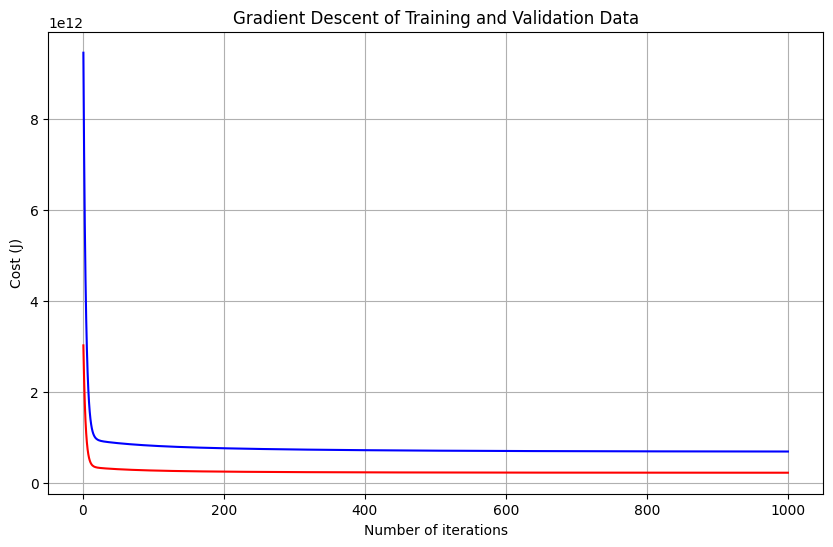

Theta validation: [2511015.71164931 3150322.13558846  609628.88942426 4614553.85143006
 1486045.49674143 1675437.87778039]
Theta training: [2363826.74940457 4177197.1746689   972521.72643534 1984533.13484891
 1582990.87665337 1060249.89582615]
Training cost: [6.98702594e+11 6.98689640e+11 6.98676734e+11 6.98663877e+11
 6.98651069e+11 6.98638308e+11 6.98625596e+11 6.98612931e+11
 6.98600314e+11 6.98587745e+11]
Validation Cost: [2.32950468e+11 2.32948024e+11 2.32945591e+11 2.32943169e+11
 2.32940759e+11 2.32938359e+11 2.32935970e+11 2.32933591e+11
 2.32931224e+11 2.32928867e+11]


In [11]:
# Separate into each parameter
t3a_area = X3a_training.values[:, 0]  # get input value for area from the inputs training
t3a_bedrooms = X3a_training.values[:, 1] # get input value for bedrooms from the inputs training
t3a_bathrooms = X3a_training.values[:, 2] # get input value for bathrooms from the inputs training
t3a_stories = X3a_training.values[:, 3] # get input value for stories from the inputs training
t3a_parking = X3a_training.values[:, 4] # get input value for parking from the inputs training
training_price3a = Y3a_training.values[:, 0]  # get price from outputs training


# Separate into each parameter
v3a_area = X3a_validation.values[:, 0]  # get input value for area from the inputs validation
v3a_bedrooms = X3a_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v3a_bathrooms = X3a_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v3a_stories = X3a_validation.values[:, 3] # get input value for stories from the inputs validation
v3a_parking = X3a_validation.values[:, 4] # get input value for parking from the inputs validation
validation_price3a = Y3a_validation.values[:, 0]  # get price from outputs validation


# Length of training and validation set
m = len(training_price3a)
n = len(validation_price3a)


# Reshape datasets for matrix operations
training_area3a = t3a_area.reshape(m,1)
training_bedrooms3a = t3a_bedrooms.reshape(m,1)
training_bathrooms3a = t3a_bathrooms.reshape(m,1)
training_stories3a = t3a_stories.reshape(m,1)
training_parking3a = t3a_parking.reshape(m,1)


# Reshape datasets for matrix operations
validation_area3a = v3a_area.reshape(n,1)
validation_bedrooms3a = v3a_bedrooms.reshape(n,1)
validation_bathrooms3a = v3a_bathrooms.reshape(n,1)
validation_stories3a = v3a_stories.reshape(n,1)
validation_parking3a = v3a_parking.reshape(n,1)


# Create an matrix of m ones for matrix operations
training3a_0 = np.ones((m,1))
validation3a_0 = np.ones((n,1))


# Combine all parameters into one matrix
training_all3a = np.hstack((training3a_0, training_area3a, training_bedrooms3a, training_bathrooms3a, training_stories3a, training_parking3a))
validation_all3a = np.hstack((validation3a_0, validation_area3a, validation_bedrooms3a, validation_bathrooms3a, validation_stories3a, validation_parking3a))


#Set learning rate, iterations, theta array, and regulization parameter
alpha = 0.1
iterations = 1000
theta_training3a = np.zeros(6)
theta_validation3a = np.zeros(6)
lambda3a  = 0.00

#Run gradient descent for new model
theta_training3a, cost_history_training3a = gradient_descent_regularization(training_all3a, training_price3a, theta_training3a, alpha, iterations, lambda3a)
theta_validation3a, cost_history_validation3a = gradient_descent_regularization(validation_all3a, validation_price3a, theta_validation3a, alpha, iterations, lambda3a)


#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training3a, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation3a, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')


# Show the plot
plt.show()


print('Theta validation:', theta_validation3a[-10:])
print('Theta training:', theta_training3a[-10:])
print('Training cost:', cost_history_training3a[-10:])
print('Validation Cost:', cost_history_validation3a[-10:])

3b

In [12]:
# Randomize selection of 80% for the data for training, and 20% for validation
# Define Input Variables
X3b = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
X3b_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


# Define Output Variables
Y3b = df[['price']]


# Split into training and validation sets
np.random.seed(9)
X3b_training, X3b_validation, Y3b_training, Y3b_validation = train_test_split(X3b, Y3b, test_size=0.2, random_state=18)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# Standardize all the inputs
X3b_training[X3b_names] = scaler.fit_transform(X3b_training[X3b_names])
X3b_training.head()
X3b_validation[X3b_names] = scaler.fit_transform(X3b_validation[X3b_names])
X3b_validation.head()


scaler2 = MinMaxScaler()
# Normalize all the inputs
X3b_training[X3b_names] = scaler2.fit_transform(X3b_training[X3b_names])
X3b_training.head()
X3b_validation[X3b_names] = scaler2.fit_transform(X3b_validation[X3b_names])
X3b_validation.head()


# Display training and validation data
print("Training Input Data:\n", X3b_training)
print("Training Output Data:\n", Y3b_training)
print("Validation Input Data:\n", X3b_validation)
print("Training Output Data:\n", Y3b_validation)

Training Input Data:
          area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
252  0.564261       0.4        0.0  0.000000       1.0        0.0       0.0   
223  0.321031       0.4        0.0  0.333333       1.0        0.0       1.0   
179  0.105155       0.4        0.5  0.333333       1.0        0.0       0.0   
10   0.793814       0.4        0.0  0.333333       1.0        0.0       1.0   
261  0.127835       0.4        0.0  0.333333       1.0        0.0       0.0   
..        ...       ...        ...       ...       ...        ...       ...   
242  0.136770       0.4        0.0  0.333333       1.0        0.0       0.0   
174  0.147766       0.4        0.0  0.333333       1.0        1.0       1.0   
120  0.336082       0.4        0.0  0.000000       1.0        1.0       1.0   
275  0.163711       0.2        0.0  0.000000       1.0        0.0       1.0   
298  0.285223       0.4        0.0  0.000000       1.0        0.0       0.0   

     hotwaterheating  aircond

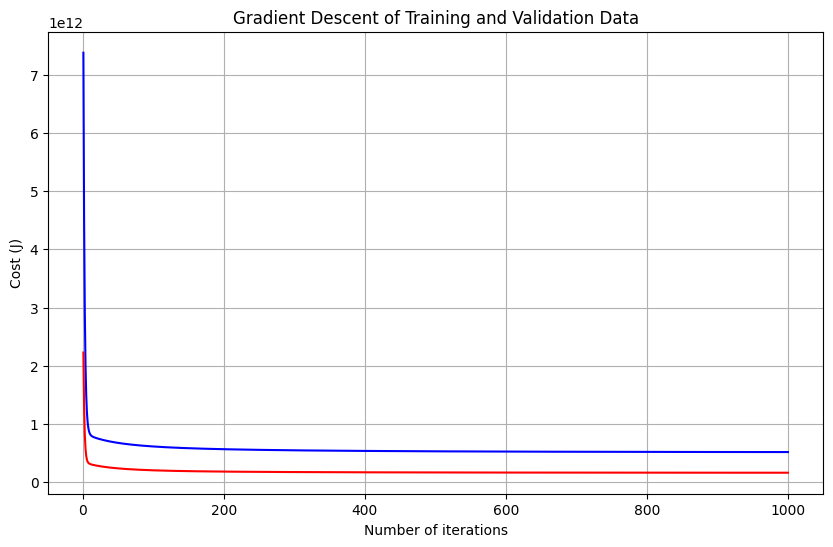

Theta for Validation: [1813329.62795326 2004198.03386238  388159.75079081 4108086.60785934
 1652591.00894704  436562.29855074  149907.97511509  292508.79615723
  540794.33769579  652741.76924596]
Theta for Training: [1744289.36195951 3098116.95388555  923358.45487796 1687558.81154796
 1214783.66309776  540942.37979715  403438.45538357  394502.60282747
 1089935.88117174  952141.09158139]
Cost for Training: [7.37512349e+12 4.55110946e+12 2.94366133e+12 2.02769024e+12
 1.50477200e+12 1.20530189e+12 1.03288684e+12 9.32741880e+11
 8.73729167e+11 8.38150183e+11]
Cost for Validation: [2.22711351e+12 1.29906937e+12 8.24182339e+11 5.80348564e+11
 4.54349252e+11 3.88469382e+11 3.53286842e+11 3.33801799e+11
 3.22366213e+11 3.15079666e+11]


In [14]:
# Separate into each parameter
t3b_area = X3b_training.values[:, 0]  # get input value for area from the inputs training
t3b_bedrooms = X3b_training.values[:, 1] # get input value for bedrooms from the inputs training
t3b_bathrooms = X3b_training.values[:, 2] # get input value for bathrooms from the inputs training
t3b_stories = X3b_training.values[:, 3] # get input value for stories from the inputs training
t3b_mainroad = X3b_training.values[:, 4] # get input value for mainroad from the inputs training
t3b_guestroom = X3b_training.values[:, 5] # get input value for guestroom from the inputs training
t3b_basement = X3b_training.values[:, 6] # get input value for basement from the inputs training
t3b_hotwaterheating = X3b_training.values[:, 7] # get input value for hotwaterheating from the inputs training
t3b_airconditioning = X3b_training.values[:, 8] # get input value for airconditioning from the inputs training
t3b_parking = X3b_training.values[:, 9] # get input value for parking from the inputs training
t3b_prefarea = X3b_training.values[:, 10] # get input value for prefarea from the inputs training
training_price3b = Y3b_training.values[:, 0]  # get price from outputs training


# Separate into each parameter
v3b_area = X3b_validation.values[:, 0]  # get input value for area from the inputs validation
v3b_bedrooms = X3b_validation.values[:, 1] # get input value for bedrooms from the inputs validation
v3b_bathrooms = X3b_validation.values[:, 2] # get input value for bathrooms from the inputs validation
v3b_stories = X3b_validation.values[:, 3] # get input value for stories from the inputs validation
v3b_mainroad = X3b_validation.values[:, 4] # get input value for mainroad from the inputs validation
v3b_guestroom = X3b_validation.values[:, 5] # get input value for guestroom from the inputs validation
v3b_basement = X3b_validation.values[:, 6] # get input value for basement from the inputs validation
v3b_hotwaterheating = X3b_validation.values[:, 7] # get input value for hotwaterheating from the inputs validation
v3b_airconditioning = X3b_validation.values[:, 8] # get input value for airconditioning from the inputs validation
v3b_parking = X3b_validation.values[:, 9] # get input value for parking from the inputs validation
v3b_prefarea = X3b_validation.values[:, 10] # get input value for prefarea from the inputs validation
validation_price3b = Y3b_validation.values[:, 0]  # get price from outputs validation


# Length of training and validation set
m = len(training_price3b)
n = len(validation_price3b)


# Reshape datasets for matrix operations
training_area3b = t3b_area.reshape(m,1)
training_bedrooms3b = t3b_bedrooms.reshape(m,1)
training_bathrooms3b = t3b_bathrooms.reshape(m,1)
training_stories3b = t3b_stories.reshape(m,1)
training_mainroad3b = t3b_mainroad.reshape(m,1)
training_guestroom3b = t3b_guestroom.reshape(m,1)
training_basement3b = t3b_basement.reshape(m,1)
training_hotwaterheating3b = t3b_hotwaterheating.reshape(m,1)
training_airconditioning3b = t3b_airconditioning.reshape(m,1)
training_parking3b = t3b_parking.reshape(m,1)
training_prefarea3b = t3b_prefarea.reshape(m,1)




# Reshape datasets for matrix operations
validation_area3b = v3b_area.reshape(n,1)
validation_bedrooms3b = v3b_bedrooms.reshape(n,1)
validation_bathrooms3b = v3b_bathrooms.reshape(n,1)
validation_stories3b = v3b_stories.reshape(n,1)
validation_mainroad3b = v3b_mainroad.reshape(n,1)
validation_guestroom3b = v3b_guestroom.reshape(n,1)
validation_basement3b = v3b_basement.reshape(n,1)
validation_hotwaterheating3b = v3b_hotwaterheating.reshape(n,1)
validation_airconditioning3b = v3b_airconditioning.reshape(n,1)
validation_parking3b = v3b_parking.reshape(n,1)
validation_prefarea3b = v3b_prefarea.reshape(n,1)




# Create an matrix of m ones for matrix operations
training3b_0 = np.ones((m,1))
validation3b_0 = np.ones((n,1))


# Combine all parameters into one matrix
training_all3b = np.hstack((training3b_0, training_area3b, training_bedrooms3b,training_bathrooms3b, training_stories3b, training_mainroad3b, training_guestroom3b, training_basement3b, training_hotwaterheating3b, training_airconditioning3b, training_parking3b, training_prefarea3b))
validation_all3b = np.hstack((validation3b_0, validation_area3b, validation_bedrooms3b,validation_bathrooms3b, validation_stories3b, validation_mainroad3b, validation_guestroom3b, validation_basement3b, validation_hotwaterheating3b, validation_airconditioning3b, validation_parking3b, validation_prefarea3b))


#Set learning rate, iterations, theta array, and regulization parameter
alpha = 0.1
iterations = 1000
theta_training3b = np.zeros(12)
theta_validation3b = np.zeros(12)
lambda3b = 0.00

#Run gradient descent for new model
theta_training3b, cost_history_training3b = gradient_descent_regularization(training_all3b, training_price3b, theta_training3b, alpha, iterations, lambda3b)
theta_validation3b, cost_history_validation3b = gradient_descent_regularization(validation_all3b, validation_price3b, theta_validation3b, alpha, iterations, lambda3b)


#Plot for training_all
plt.plot(range(1, iterations + 1), cost_history_training3b, color='blue')
plt.plot(range(1, iterations + 1), cost_history_validation3b, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent of Training and Validation Data')


# Show the plot
plt.show()


print('Theta for Validation:', theta_validation3b[:10])
print('Theta for Training:', theta_training3b[:10])
print('Cost for Training:', cost_history_training3b[:10])
print('Cost for Validation:', cost_history_validation3b[:10])